# Launch buttons for interactivity

Because Jupyter Books are built with Jupyter notebooks, you can allow users to launch
live Jupyter sessions in the cloud directly from your book. This lets readers quickly interact with your content in a traditional coding interface.
There now exist numerous online notebook services - a good comparison is provided [in this article](https://www.dataschool.io/cloud-services-for-jupyter-notebook) - and the following sections describes the available integrations provided by Jupyter Book.

In each case, you'll need to tell Jupyter Book where your book content lives online.
To do so, use this configuration in `_config.yml`:

```yaml
# Information about where the book exists on the web
repository:
  url                       : https://github.com/yourusername/yourbookrepo  # Online location of your book
  path_to_book              : path/to/book  # Optional path to your book, relative to the repository root
  branch                    : master  # Which branch of the repository should be used when creating links (optional)
```

The `repository:` configuration line uses `url`, `path_to_book`, and `branch` to find your notebook
files.  

- The `url` should be a GitHub repository that includes your source files used to build the
  Jupyter Book. Your repository should include:
    - `_config.yml`
    - `_toc.yml`
    - `requirements.txt`: packages for binder or general reproducibility
    - _the source files in *.ipynb and *.md_
- The `path_to_book` should used if your book is in a sub-folder of your repository (e.g. `docs/` or
  `book/`)
- The `branch` should be the branch where your book's source files are stored. It _should not be_
  the [`gh-pages` branch](https://jupyterbook.org/publish/gh-pages.html). 


## The notebook interface

Binder and JupyterHub sessions can be opened using either the "classic" Jupyter Notebook or the new JupyterLab interface backend (see [jupyter.org](https://jupyter.org) for more details).
This is configured using:

```yaml
launch_buttons:
  notebook_interface: "jupyterlab"  # or "classic"
```

One thing to take into account when choosing the interface is that notebooks written in the [MyST Markdown](../file-types/myst-notebooks.md) text-based format will not be opened as notebooks out-of-the-box.
 If you wish for these files to be opened as notebooks then firstly you must ensure that [`jupytext>=0.16`](https://jupytext.readthedocs.io/en/latest/formats.html#myst-markdown) is installed in the Binder/JupyterHub environment for your book (no support for this feature exists in Google Colab).
You then have two options:

- Use the "classic" interface, which will then immediately open these files as notebooks.
- The "jupyterlab" interface (at the time of writing) has not yet implemented this behaviour, and so you will need to instruct readers to right-click the Markdown file and click "Open in notebook editor".

## {term}`Binder` buttons for your pages

{term}`BinderHub` can be used to build the environment needed to run a repository, and provides
a link that lets others interact with that repository. If your Jupyter Book is hosted online
on GitHub, you can automatically insert buttons that link to the Jupyter Notebook running in a BinderHub.
When a user clicks the button, they'll be taken to a live version of the page. If your code
doesn't require a significant amount of CPU or RAM, you can use the free, public BinderHub running
at https://mybinder.org.

To automatically include Binder link buttons in each page of your Jupyter Book, use the following
configuration in `_config.yml`:

```yaml
launch_buttons:
  binderhub_url: "https://mybinder.org"  # The URL for your BinderHub (e.g., https://mybinder.org)
```

By adding this configuration, along with the repository url configuration above, Jupyter Book
will insert Binder links to any pages that were built from notebook content.



## JupyterHub buttons for your pages

JupyterHub lets you host an online service that gives users their own Jupyter servers with an environment that you specify for them.
It allows you to give users access to resources and hardware that you provision in the cloud, and allows you to authenticate users in order to control who has access to your hardware.

Similar to Binder link buttons, you can also automatically include interact links that send your readers to a JupyterHub that is running a live, interactive version of your page.
This is accomplished using the [nbgitpuller](https://github.com/jupyterhub/nbgitpuller) server extension.

You can configure the location of the JupyterHub (which you may set up on your own using a guide such as [zero to jupyterhub for kubernetes](https://z2jh.jupyter.org) or [the littlest jupyterhub](https://tljh.jupyter.org)) with the following configuration:

```yaml
launch_buttons:
  jupyterhub_url: "your-hub-url"  # The URL for your JupyterHub. (e.g., https://datahub.berkeley.edu)
```

On your JupyterHub server, you need two dependencies installed:
1. To clone the notebook with the launch link, the server needs
[`nbgitpuller`](https://jupyterhub.github.io/nbgitpuller/). 

2. To open myst-markdown as notebooks, the server needs
[`jupytext>=0.16`](https://jupytext.readthedocs.io/en/latest/formats.html#myst-markdown). 

You can add the following line to your `DockerFile`:
```
RUN pip install jupytext nbgitpuller
```

## {term}`Google Colab` buttons for your pages

If your Jupyter Book is hosted online on GitHub, you can automatically insert buttons that link to the Jupyter Notebook running on [Google Colab](https://colab.research.google.com/).
When a user clicks the button, they'll be taken to a live version of the page.

Similar to Binder link buttons, you can automatically include Google Colab link buttons with the following configuration in `_config.yml`:

```yaml
launch_buttons:
  colab_url: "https://colab.research.google.com"
```

```{note}
Google Colab links will only work for pages that have the `.ipynb` extension.
```

(launch/thebelab)=
## Live interactive pages with ThebeLab

This section describes how to bring interactivity to your book. This lets users
run code and see outputs *without leaving the page*. Interactivity is provided
by a kernel running on the public [**MyBinder**](https://mybinder.org) service.

```{warning}
This is an experimental feature, and may change in the future or work unexpectedly.
```

To make your content interactive without requiring readers to leave the current page,
you can use a project called [Thebe](https://github.com/minrk/thebelab). 
This provides you with a button that, when clicked, will convert each code cell into
an **interactive** cell that can be edited. It also adds a "run" button to each cell,
and connects to a Binder kernel running in the cloud.
As an alternative to pressing the Thebe button at the top of the page, you 
can press the <img src="../images/logo/edit-button.svg" alt="" style="width: 20px; display: inline;" /> symbol in the top right corner of each code cell to start the 
interactive mode.

To add a Thebe button to your Jupyter Book pages, use the following configuration:

```yaml
launch_buttons:
  thebe                  : true
```

In addition, you can configure the Binder settings that are used to provide a kernel for
Thebe to run the code. These use the same configuration fields as the BinderHub interact
buttons described above.

For an example, click the **Thebe** button above on this page, and run the code below.

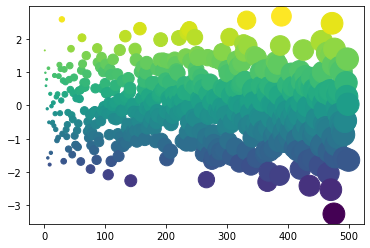

In [1]:
import numpy as np
import matplotlib.pyplot as plt
plt.ion()

x = np.arange(500)
y = np.random.randn(500)

fig, ax = plt.subplots()
ax.scatter(x, y, c=y, s=x)

### Running cells in Thebe when it is initialized

Sometimes you'd like to initialize the kernel that Thebe uses by running
some code ahead of time. This might be code that you then hide from the user
in order to narrow the focus of what they interact with. This is possible
by using Jupyter Notebook tags.

Adding the tag `thebe-init` to any code cell will cause Thebe to
run this cell after it has received a kernel. Any subsequent Thebe cells
will have access to the same environment (e.g. any module imports made in the
initialization cell).

You can then pair this with something like `hide-input` in order to run
initialization code that your user doesn't immediately see. For example,
below we'll initialize a variable in a hidden cell, and then tell another
cell to print the output of that variable.

In [2]:
my_hidden_variable = 'wow, it worked!'

In [3]:
# The variable for this is defined in the cell above!
print(my_hidden_variable)

wow, it worked!
